In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import gensim
from gensim import corpora
pd.set_option("display.max_colwidth", 200)

import operator
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


import nltk
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score,roc_auc_score

In [2]:
path = "./train.csv"
test_path = "./test.csv"
data_train = pd.read_csv(path)
data_test =pd.read_csv(test_path)

In [3]:
data_test1 = data_test['tweet_id']

In [4]:
data_train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [5]:
data_train.shape

(7274, 3)

In [6]:
data_train['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

1    0.592659
2    0.327468
0    0.062689
3    0.017184
Name: sentiment, dtype: float64


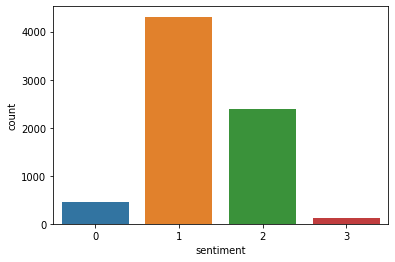

In [7]:
print(data_train['sentiment'].value_counts()/data_train['sentiment'].value_counts().sum())

sns.countplot(data_train['sentiment'],data=data_train)

In [8]:
data_train = data_train.drop(['tweet_id'],axis=1)
data_test = data_test.drop(['tweet_id'],axis=1)

In [9]:
#remove punctuation,special character and retain only alphabates
data_train['tweet'] = data_train['tweet'].apply(lambda x : re.sub('[^a-zA-Z]',' ', str(x)))

stop_set = ['sxsw','quot','rt','amp','circle','sxswi']
stop = set(stopwords.words('english'))
for word in stop_set:
    stop.add(word)
custom = list(stop)+list(punctuation) 

#lower case
data_train['tweet']=data_train['tweet'].apply(lambda x:x.lower())

#tokenize
data_train['tweet'] = data_train['tweet'].apply(lambda x: nltk.word_tokenize(x))

#stopword removal
data_train['tweet'] = data_train['tweet'].apply(lambda row: [word for word in row if word not in custom])

#Lemmatization
lemma = WordNetLemmatizer()

data_train['tweet'] = data_train['tweet'].apply(lambda x : [lemma.lemmatize(i) for i in x])
data_train['tweet'] = data_train['tweet'].apply(lambda x : ' '.join(x))

In [10]:
data_train.head()

,tweet,sentiment
0,sxswnui apple defining language touch different dialect becoming smaller,1
1,learning ab google doodle doodle light funny innovative exception significant occasion googledoodle,1
2,one face ex stealing show yr mention apple school mkt expert link,2
3,iphone app would b pretty awesome crash every min extended browsing fuckit illmakeitwork,0
4,line outside apple store austin waiting new ipad link,1


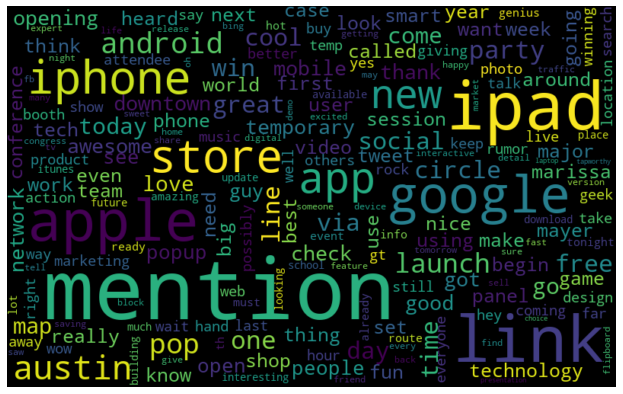

In [11]:
positive_data=data_train[data_train.sentiment==2]

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# Join the different processed jobs together
long_string = ','.join(list(positive_data['tweet'].values))

# generate wordcloud object for positive sentiments
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(long_string)

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

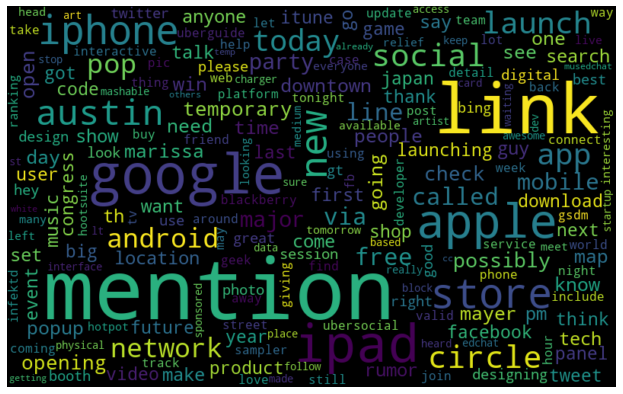

In [12]:
neutral_data=data_train[data_train.sentiment==1]

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# Join the different processed jobs together
longg_string = ','.join(list(neutral_data['tweet'].values))

# generate wordcloud object for neutral sentiments
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(longg_string)

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
X = data_train['tweet']
y = data_train['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('No of train records: {}'.format(X_train.shape[0]))
print('No of test records: {}'.format(X_test.shape[0]))

No of train records: 5091
No of test records: 2183


In [14]:
# initialize tfidf vectorizer
tfidf_vectorizer= TfidfVectorizer(ngram_range=(1,4))

# fit and transform with count vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
# description = tfidf_vectorizer.fit_transform(data_train['tweet'])

# # initialize empty dictionary
# words = {}

# # initialize with 0
# i = 0

# # Number of time every feature appears over the entire document
# sums = np.array(np.sum(description, axis=0)).flatten()

# # Loop to map 'sums' to its word
# for word in tfidf_vectorizer.get_feature_names():
#     words[word] = sums[i]
#     i += 1

# # Top 20 most occuring words
# top_20 = sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:20]

# # Display top 20 words
# top_20_words = [i[0] for i in top_20]
# top_20_values = [i[1] for i in top_20]
# plt.figure(figsize=(20,10))
# sns.barplot(top_20_words,top_20_values)
# plt.show()

In [16]:
# from imblearn.over_sampling import SMOTE
# X_resampled, y_resampled = SMOTE(sampling_strategy='dict',random_state=42, ratio=1.0).fit_sample(X_train_tfidf, y_train)

In [17]:
#Naive-Bayes

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=.01)
clf.fit(X_train_tfidf, y_train)
y_pred=clf.predict(X_test_tfidf) 
f1_NB = f1_score(y_test,y_pred, average='weighted')
print("f1_score: ",f1_NB)
precision_NB = precision_score(y_test,y_pred, average='weighted')
print("precision_score: ",precision_NB)
recall_NB = recall_score(y_test,y_pred, average='weighted')
print("recall_score: ",recall_NB)
#roc_NB = roc_auc_score(y_test,y_pred, average='weighted')
#print(roc_NB)
print(multilabel_confusion_matrix(y_test,y_pred))
#tn, fp, fn, tp = multilabel_confusion_matrix(y_test,y_pred).ravel()
#print(tn, fp, fn, tp)

f1_score:  0.6417036596852753
precision_score:  0.6385897094960563
recall_score:  0.6500229042601924
[[[2014   37]
  [  85   47]]

 [[ 453  423]
  [ 302 1005]]

 [[1185  287]
  [ 345  366]]

 [[2133   17]
  [  32    1]]]


In [20]:
#SVC

In [21]:
from sklearn.svm import SVC
#from sklearn import svm
model =  SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train_tfidf,y_train)
y_pred_svm = model.predict(X_test_tfidf)
score_svm = f1_score(y_test,y_pred_svm, average='weighted')
print(score_svm)

C:\Users\Shambhavi\ana\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shambhavi\ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4484375881879646


In [22]:
#from sklearn import svm, grid_search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel' : ['linear', 'rbf'], 'C' : [100, 20, 1, 0.1]}
grid_search_model = GridSearchCV(estimator=SVC(), scoring='f1_weighted', param_grid=parameters)
grid_search_model.fit(X_train_tfidf, y_train)

grid_search_model.best_params_

C:\Users\Shambhavi\ana\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shambhavi\ana\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shambhavi\ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'C': 20, 'kernel': 'linear'}

In [23]:
svc1 = SVC(kernel= 'linear', C= 20)
svc1.fit(X_train_tfidf, y_train)
y_pred_svc = svc1.predict(X_test_tfidf)
f1_svc = f1_score(y_test,y_pred_svc, average='weighted')
print("f1_score: ",f1_svc)
precision_svc = precision_score(y_test,y_pred_svc, average='weighted')
print("precision_score: ",precision_svc)
recall_svc = recall_score(y_test,y_pred_svc, average='weighted')
print("recall_score: ",recall_svc)
#roc_svc = roc_auc_score(y_test,y_pred_svc, average='weighted')
#print(roc_svc)
print(multilabel_confusion_matrix(y_test,y_pred_svc))
#tn, fp, fn, tp = multilabel_confusion_matrix(y_test,y_pred_svc, average='weighted').ravel()
#print(tn, fp, fn, tp)

f1_score:  0.6538654751388937
precision_score:  0.6525428595367806
recall_score:  0.6619331195602383
[[[2024   27]
  [  89   43]]

 [[ 490  386]
  [ 304 1003]]

 [[1156  316]
  [ 313  398]]

 [[2141    9]
  [  32    1]]]


In [24]:
#Decision Tree

In [25]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train_tfidf, y_train)
tree_predictions = tree.predict(X_test_tfidf) 
f1_dt = f1_score(y_test,tree_predictions,average='weighted')
print(f1_dt)

C:\Users\Shambhavi\ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49053645052228934


In [26]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  
locally_best_tree.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 11)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [27]:
locally_best_tree.best_params_

{'max_depth': 5}

In [28]:
tuned_tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tuned_tree.fit(X_train_tfidf, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test_tfidf)
f1_dt = f1_score(y_test,tuned_tree_predictions, average='weighted')
print("f1_score: ",f1_dt)
precision_dt = precision_score(y_test,tuned_tree_predictions, average='weighted')
print("precision_score: ",precision_dt)
recall_dt = recall_score(y_test,tuned_tree_predictions, average='weighted')
print("recall_score: ",recall_dt)
#roc_dt = roc_auc_score(y_test,tuned_tree_predictions, average='weighted')
#print(roc_dt)
print(multilabel_confusion_matrix(y_test,tuned_tree_predictions))
#tn, fp, fn, tp = multilabel_confusion_matrix(y_test,tuned_tree_predictions, average='weighted').ravel()
#print(tn, fp, fn, tp)

C:\Users\Shambhavi\ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score:  0.5150151659864717


C:\Users\Shambhavi\ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


precision_score:  0.6144144965338418
recall_score:  0.619331195602382
[[[2047    4]
  [ 129    3]]

 [[  86  790]
  [  34 1273]]

 [[1435   37]
  [ 635   76]]

 [[2150    0]
  [  33    0]]]


In [29]:
#XGBoost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Code starts here
xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(X_train_tfidf,y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
score_xgb = f1_score(y_test,y_pred_xgb,average='weighted')
print(score_xgb)

0.5606464228106918


In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],'max_depth':range(1,3)}
clf1_model = GridSearchCV(estimator=xgb_model , param_grid=parameters)
clf1_model.fit(X_train_tfidf,y_train)

clf1_model.best_params_

C:\Users\Shambhavi\ana\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.25, 'max_depth': 2}

In [32]:
xgb = XGBClassifier(learning_rate=0.25, max_depth=2, random_state=0)
xgb.fit(X_train_tfidf, y_train)
y_pred_XGB = xgb.predict(X_test_tfidf)
f1_xgb = f1_score(y_test,y_pred_XGB, average='weighted')
print("f1_score: ",f1_xgb)
precision_xgb = precision_score(y_test,y_pred_XGB, average='weighted')
print("precision_score: ",precision_xgb)
recall_xgb = recall_score(y_test,y_pred_XGB, average='weighted')
print("recall_score: ",recall_xgb)
print(multilabel_confusion_matrix(y_test,y_pred_XGB))

f1_score:  0.5835953459068954
precision_score:  0.6473849552499924
recall_score:  0.6491067338524965
[[[2046    5]
  [ 122   10]]

 [[ 198  678]
  [  72 1235]]

 [[1390   82]
  [ 539  172]]

 [[2149    1]
  [  33    0]]]


In [33]:
Models = ['Naive-Bayes','SVM','Decision Tree','XGBoost']
Precision_score = [precision_NB, precision_svc, precision_dt,precision_xgb]
F1_score = [f1_NB, f1_svc, f1_dt,f1_xgb]
Recall_score = [recall_NB,recall_svc,recall_dt,recall_xgb]
#ROC_score = [roc_NB,roc_svc,roc_dt]
pd.DataFrame({'Models': Models, 'Precision Score': Precision_score,'Recall Score': Recall_score ,'F1 Score' : F1_score})

,Models,Precision Score,Recall Score,F1 Score
0,Naive-Bayes,0.638590,0.650023,0.641704
1,SVM,0.652543,0.661933,0.653865
2,Decision Tree,0.614414,0.619331,0.515015
3,XGBoost,0.647385,0.649107,0.583595


### for test data

In [34]:
#remove punctuation,special character and retain only alphabates
data_train['tweet'] = data_test['tweet'].apply(lambda x : re.sub('[^a-zA-Z]',' ', str(x)))

stop_set = ['quot','rt','amp','circle','sxswi']
stop = set(stopwords.words('english'))
for word in stop_set:
    stop.add(word)
custom = list(stop)+list(punctuation) 

#lower case
data_test['tweet']= data_test['tweet'].apply(lambda x:x.lower())

#tokenize
data_test['tweet'] = data_test['tweet'].apply(lambda x: nltk.word_tokenize(x))

#stopword removal
data_test['tweet'] = data_test['tweet'].apply(lambda row: [word for word in row if word not in custom])

#Lemmatization
lemma = WordNetLemmatizer()

data_test['tweet'] = data_test['tweet'].apply(lambda x : [lemma.lemmatize(i) for i in x])
data_test['tweet'] = data_test['tweet'].apply(lambda x : ' '.join(x))

In [35]:
data_test.shape

(1819, 1)

In [36]:
df=data_test.iloc[:,0]

In [37]:
data_test_tfidf = tfidf_vectorizer.transform(df)

In [38]:
y_pred_test = svc1.predict(data_test_tfidf)
df = pd.DataFrame({'sentiment':np.array(y_pred_test)})

In [39]:
test_dataset = pd.concat([data_test1,df],axis=1,sort=False)
test_dataset.head()

,tweet_id,sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,2


In [40]:
test_dataset['sentiment'].value_counts()

1    1167
2     593
0      53
3       6
Name: sentiment, dtype: int64

In [37]:
# Submission CSV file
submit = test_dataset
submit.to_csv('Final submission.csv', index = False)